In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
mfg_df= pd.read_csv("messy_manufacturing_data.csv")
operator_df= pd.read_csv("operator_info.csv")
supplier_performance= pd.read_csv("supplier_performance.csv")
machine_df= pd.read_csv("machine_info.csv")
calibration_df= pd.read_csv("calibration_records.csv")

In [4]:
mfg_df.info() #to get overview about no. of column and rows, data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   BatchID                  100000 non-null  int64  
 1   ProductType              100000 non-null  object 
 2   ProductionDate           100000 non-null  object 
 3   Length_mm                95000 non-null   float64
 4   Diameter_mm              97000 non-null   float64
 5   DefectCount              98000 non-null   float64
 6   OperatorID               100000 non-null  object 
 7   Shift                    100000 non-null  object 
 8   Temperature              99000 non-null   float64
 9   Humidity                 100000 non-null  float64
 10  MaterialType             100000 non-null  object 
 11  MachineID                100000 non-null  object 
 12  CalibrationDate          100000 non-null  object 
 13  SupplierID               100000 non-null  object 
 14  Shift

In [5]:
#to convert col index 2 and 12 to proper date time format from obj datatype
date_cols= ['ProductionDate', 'CalibrationDate']
for col in date_cols:
    mfg_df[col]= pd.to_datetime(mfg_df[col], format= '%m/%d/%Y')

In [6]:
#to get columns' heads with missing values as an array/list
missing_val_cols= mfg_df.columns[mfg_df.isnull().any()].tolist()
missing_val_cols

['Length_mm', 'Diameter_mm', 'DefectCount', 'Temperature']

In [7]:
#to replace those missing values with the corresponding median values
for col in missing_val_cols:
    median_val= mfg_df[col].median()
    mfg_df[col]= mfg_df[col].fillna(median_val)

In [8]:
#mfg_df.info() #all column will have equal num of rows

In [9]:
numeric_cols= mfg_df.select_dtypes(include=['number']).columns.tolist() #to get only numeric columns
numeric_cols

['BatchID',
 'Length_mm',
 'Diameter_mm',
 'DefectCount',
 'Temperature',
 'Humidity',
 'OperatorExperienceYears',
 'DowntimeMinutes',
 'BatchYieldPercentage',
 'CostPerUnit']

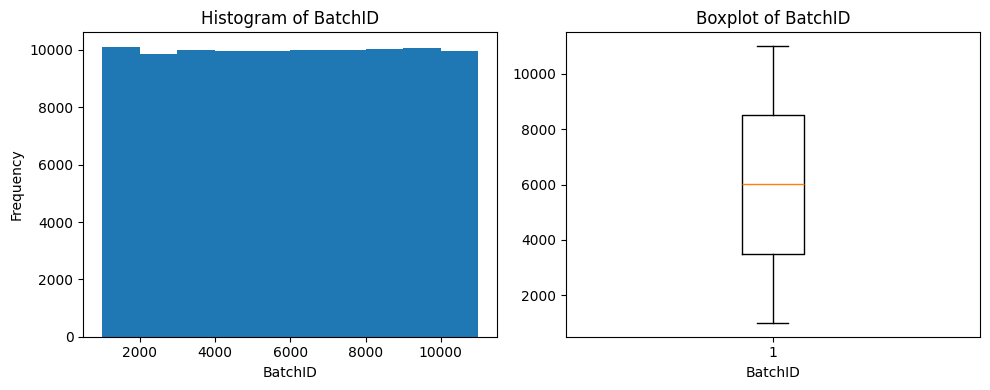

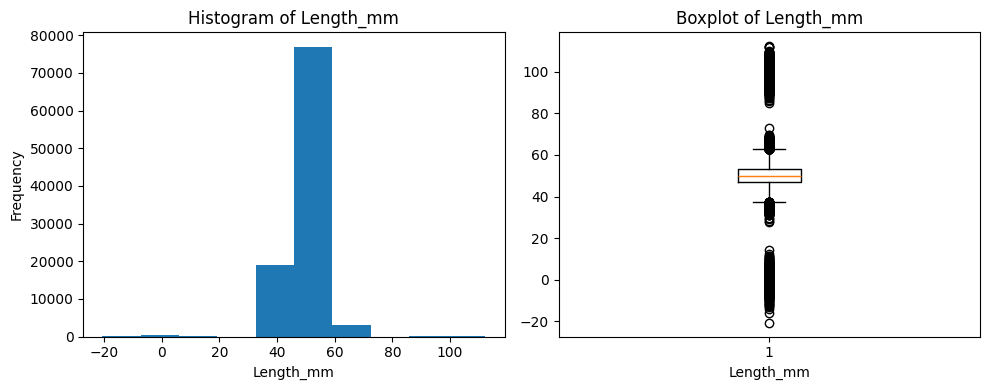

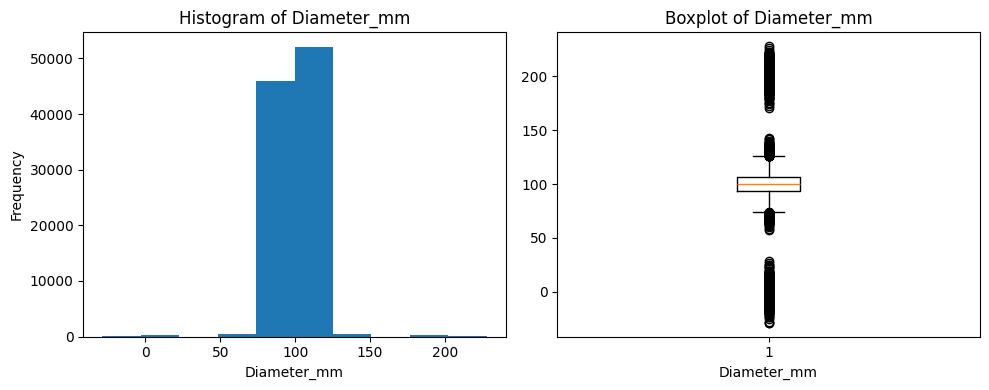

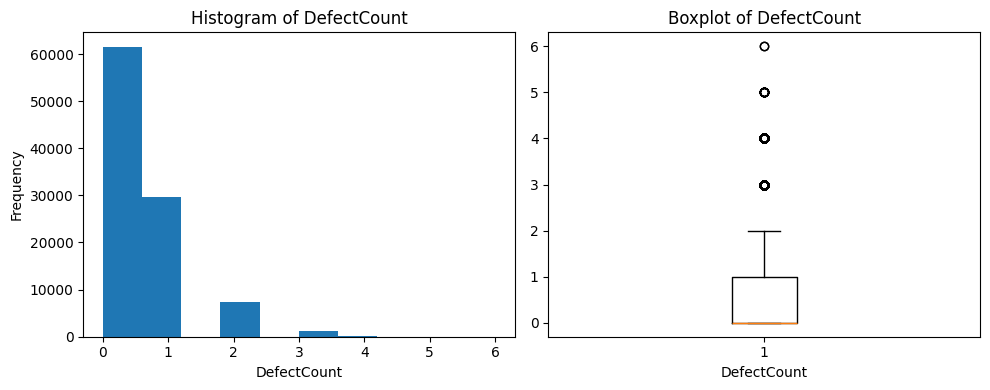

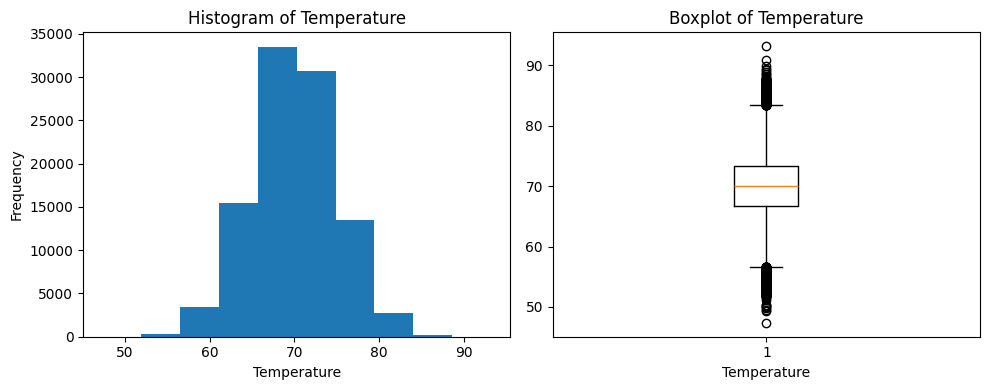

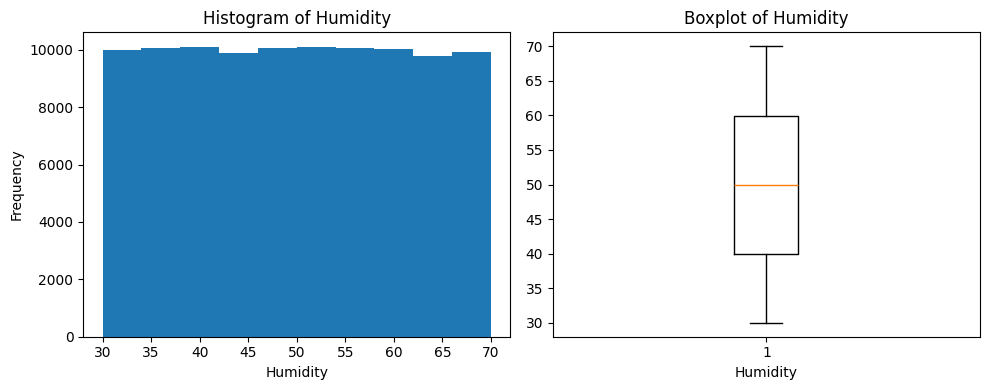

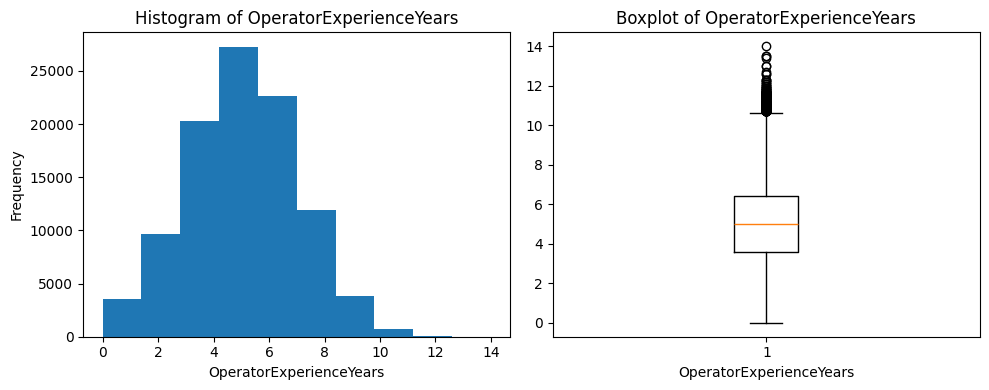

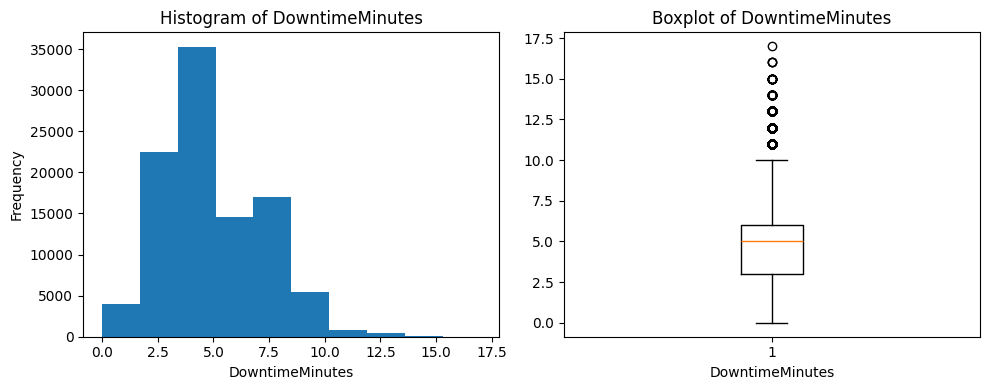

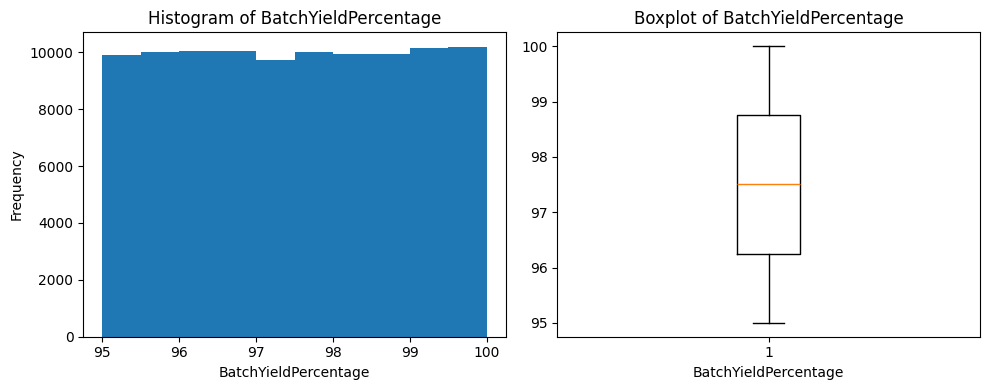

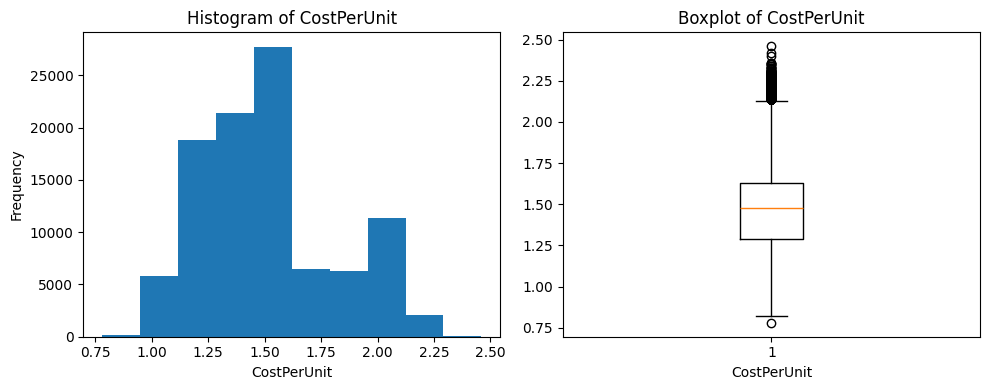

In [10]:
#to show plots(histogram(in left side) & boxplot(in right)) for each numeric column to get idea about their dist.
for col in numeric_cols:
    data= mfg_df[col].dropna() #to remove missing values
    fig, (ax_hist, ax_box)= plt.subplots(1, 2, figsize=(10, 4)) #ax_hist for plot of index 0 and ax_box for plot of index 1
    #for histogram
    ax_hist.hist(data)
    ax_hist.set_title(f'Histogram of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    #for boxplot
    ax_box.boxplot(data)
    ax_box.set_title(f'Boxplot of {col}')
    ax_box.set_xlabel(col)
    
    plt.tight_layout() #prevents overlapping of titles and labels
    plt.show()



Removing Outliers

In [16]:
#removing outliers by mean for those columns whose dist are close to normal dist.
import numpy as np
normal_numeric_col= ['Length_mm', 'Diameter_mm', 'Temperature', 'Humidity',
                     'OperatorExperienceYears', 'BatchYieldPercentage']
for col in normal_numeric_col:
    mean_val= mfg_df[col].mean()
    std_dev= mfg_df[col].std()
    lower_bound= mean_val-3*std_dev
    upper_bound= mean_val+3*std_dev
    mfg_df[col]= np.where((mfg_df[col]>upper_bound) | (mfg_df[col]<lower_bound),
                          mean_val, mfg_df[col])
    

In [17]:
#removing outliers by median for those columns whose dist aren't close to normal dist.
import numpy as np
skewed_numeric_col= ['DefectCount', 'DowntimeMinutes', 'CostPerUnit']
for col in skewed_numeric_col:
    med_val= mfg_df[col].median()
    Q1= mfg_df[col].quantile(0.25)
    Q3= mfg_df[col].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= IQR-1.5*Q1
    upper_bound= IQR+1.5*Q3
    mfg_df[col]= np.where((mfg_df[col]>upper_bound) | (mfg_df[col]<lower_bound),
                          mean_val, mfg_df[col])

In [18]:
mfg_df.to_csv("mfg_data_cleaned.csv", index=False)

In [19]:
data_cleaned= pd.read_csv("mfg_data_cleaned.csv")

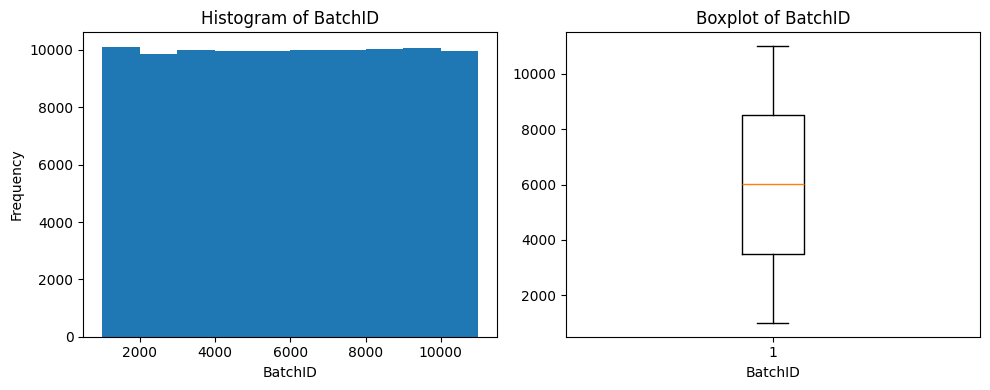

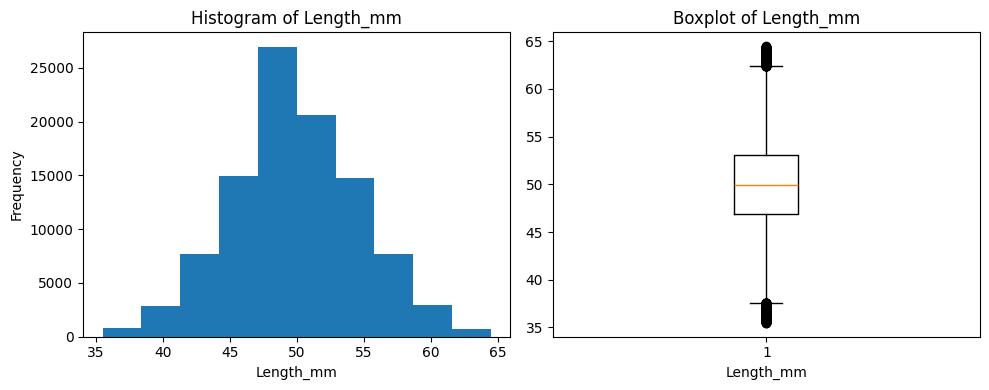

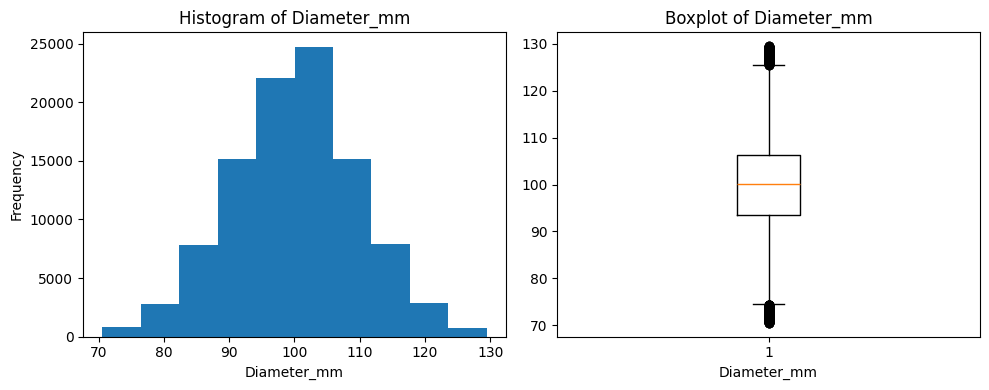

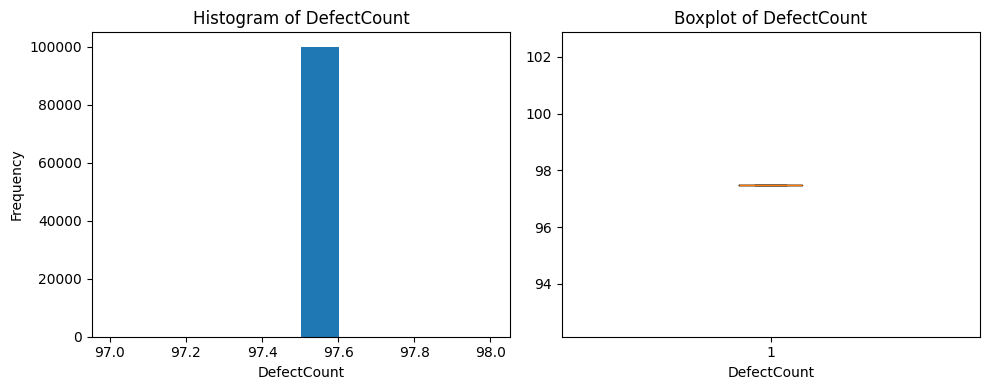

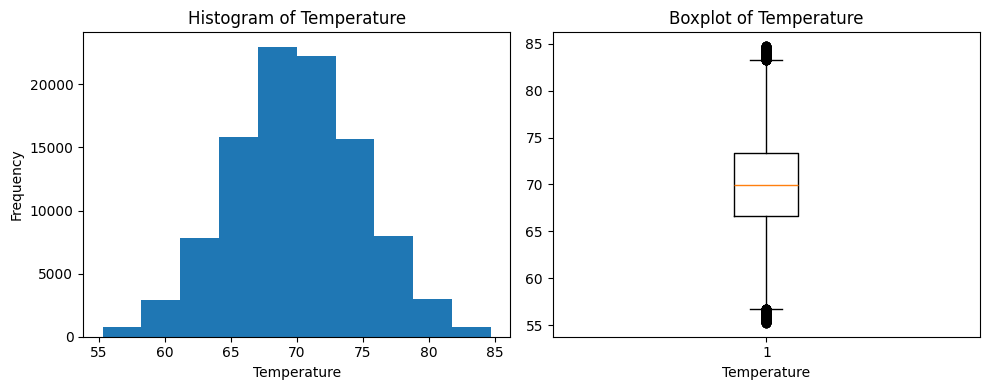

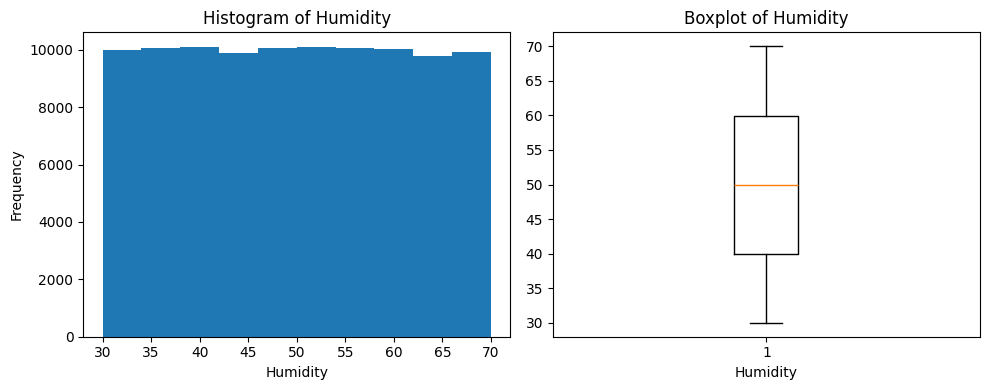

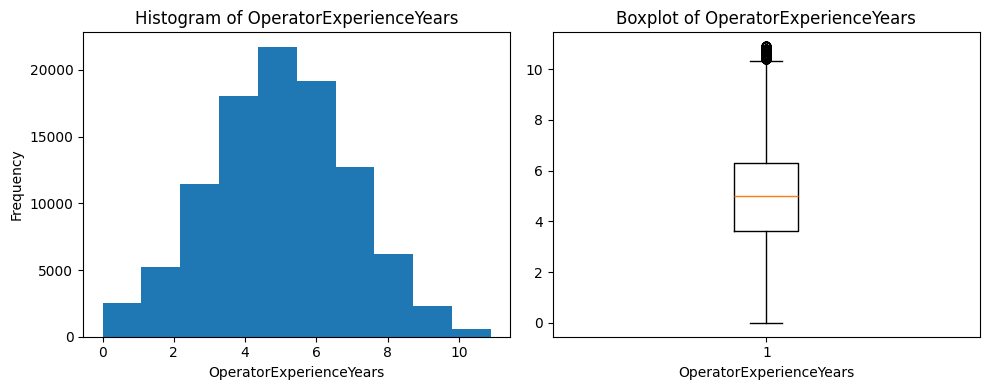

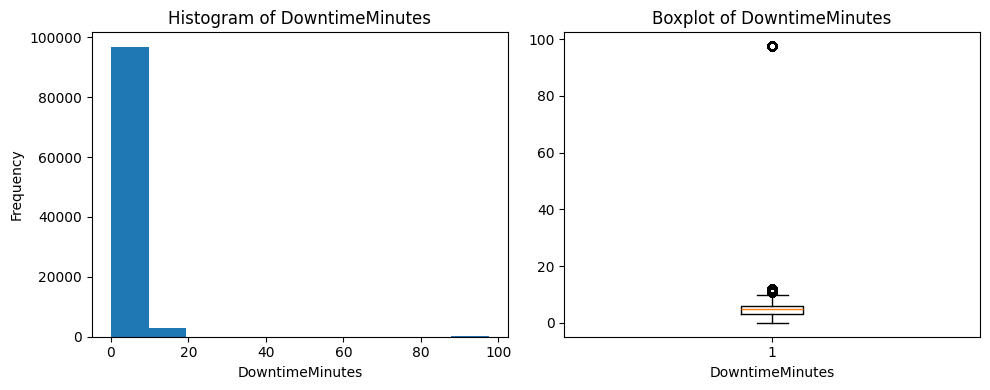

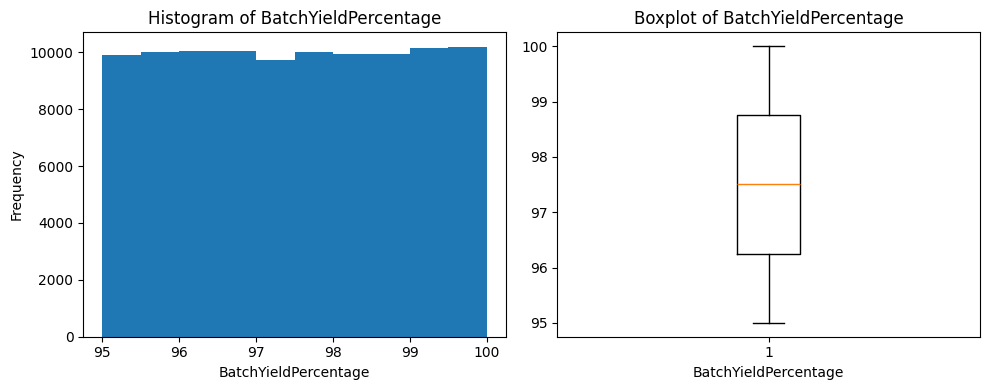

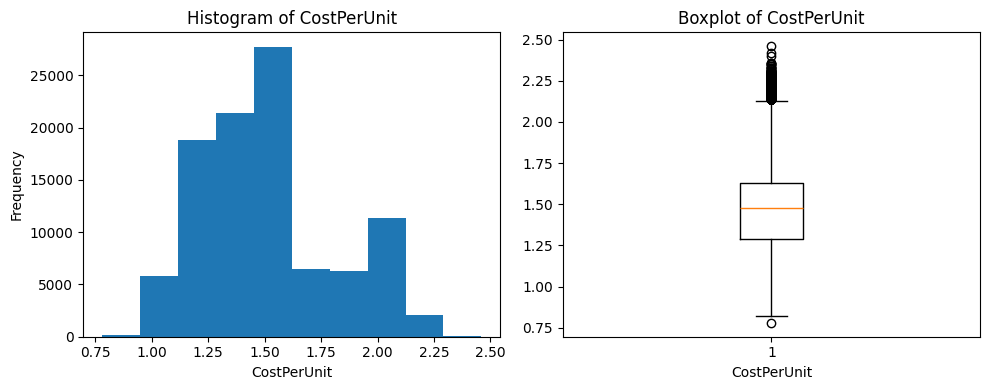

In [20]:
for col in numeric_cols:
    data= data_cleaned[col].dropna()
    fig, (ax_hist, ax_box)= plt.subplots(1, 2, figsize=(10, 4))
    ax_hist.hist(data)
    ax_hist.set_title(f'Histogram of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Frequency')
    #for boxplot
    ax_box.boxplot(data)
    ax_box.set_title(f'Boxplot of {col}')
    ax_box.set_xlabel(col)
    
    plt.tight_layout()
    plt.show()